# Data Visualization Using Seaborn Library
# Visualizing statistical relationships

In [1]:
# Import Important Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

## Import Different Datasets

In [2]:
flight_dataset = sns.load_dataset("flights")
tips_dataset = sns.load_dataset("tips")
fmri_dataset = sns.load_dataset("fmri")

## Visualizing statistical relationships

In [3]:
flight_dataset.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [4]:
tips_dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
fmri_dataset.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


## RelPlot
### 2D RelPlot

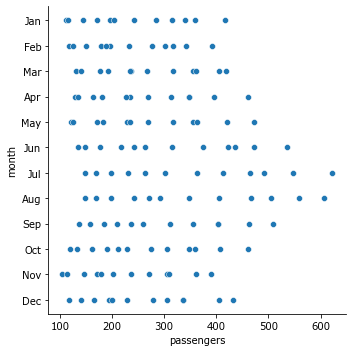

In [6]:
sns.relplot(x = flight_dataset["passengers"], y = flight_dataset["month"])

### 3D RelPlot

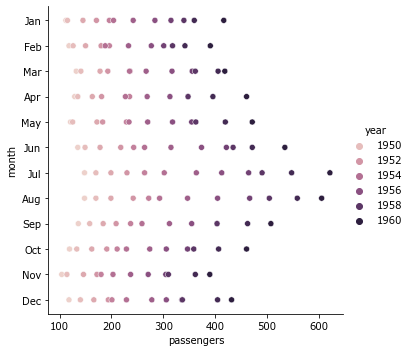

In [7]:
sns.relplot(x = "passengers", y = "month", hue = "year", data = flight_dataset)

#### _To emphasize the difference between the classes, and to improve accessibility, you can use a different marker style for each class:_

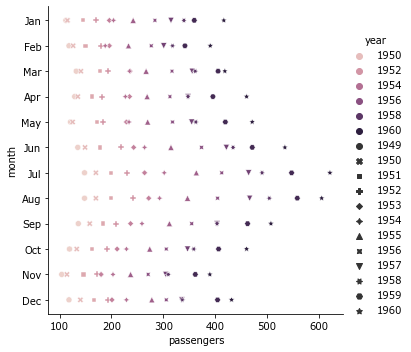

In [8]:
sns.relplot(x = "passengers", y = "month", hue = "year", style = "year", data = flight_dataset)

#### _you can customize the color palette. There are many options for doing so. Here, we customize a sequential palette using the string interface_

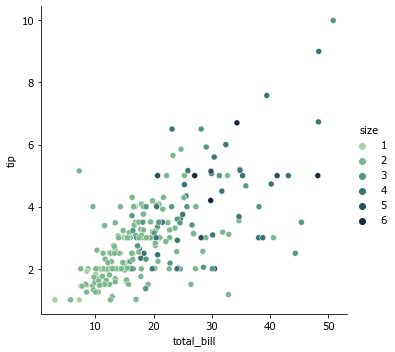

In [9]:
sns.relplot(x = "total_bill", y = "tip", hue = "size", palette="ch:r=-.5,l=.75",data = tips_dataset)

#### _The third kind of semantic variable changes the size of each point:_

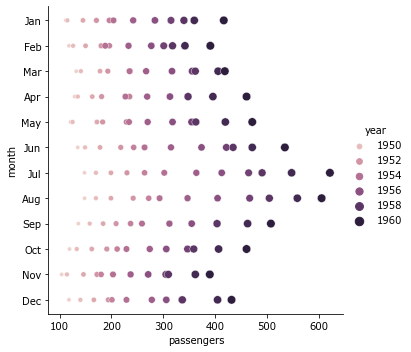

In [10]:
sns.relplot(x = "passengers", y = "month", hue = "year", size = "year", data = flight_dataset)

#### _Change the size_

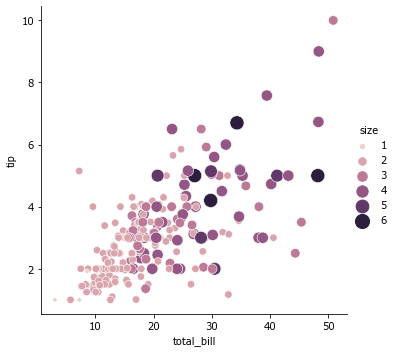

In [11]:
sns.relplot(x = "total_bill", y = "tip", hue = "size", size = "size", sizes = (20, 200), data = tips_dataset)

## Emphasizing continuity with line plots

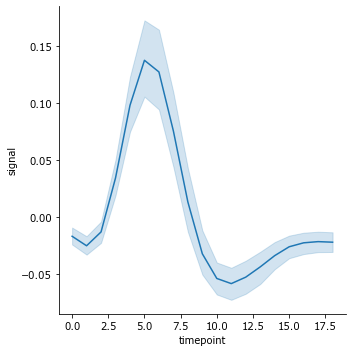

In [12]:
sns.relplot(x = "timepoint", y = "signal", kind = "line", data = fmri_dataset)

#### _The confidence intervals are computed using bootstrapping, which can be time-intensive for larger datasets. It’s therefore possible to disable them:_

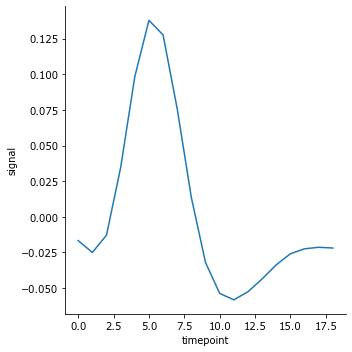

In [13]:
sns.relplot(x = "timepoint", y = "signal", ci = None,kind = "line", data = fmri_dataset)

#### _Another good option, especially with larger data, is to represent the spread of the distribution at each timepoint by plotting the standard deviation instead of a confidence interval:_

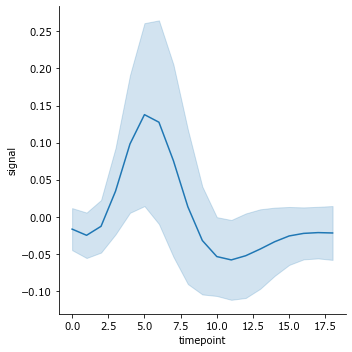

In [14]:
sns.relplot(x = "timepoint", y = "signal", ci = "sd",kind = "line", data = fmri_dataset)

#### _To turn off aggregation altogether, set the estimator parameter to None This might produce a strange effect when the data have multiple observations at each point._

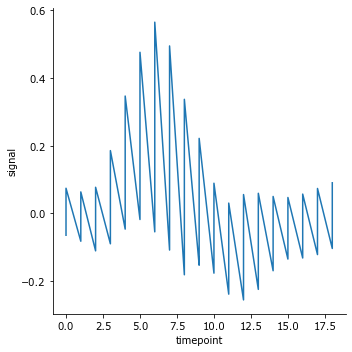

In [15]:
sns.relplot(x = "timepoint", y = "signal", estimator = None, kind = "line", data = fmri_dataset)

### _The lineplot() function has the same flexibility as scatterplot(): it can show up to three additional variables by modifying the hue, size, and style of the plot elements._

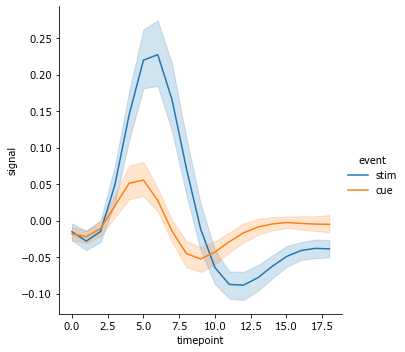

In [16]:
sns.relplot(x = "timepoint", y = "signal", kind = "line", hue = "event", data = fmri_dataset)

#### _Adding a style semantic to a line plot changes the pattern of dashes in the line by default:_

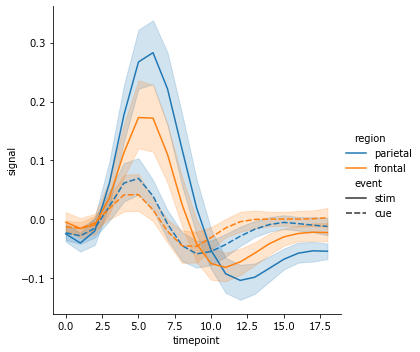

In [17]:
sns.relplot(x = "timepoint", y = "signal", hue = "region", style = "event", kind = "line", data = fmri_dataset);

#### _But you can identify subsets by the markers used at each observation, either together with the dashes or instead of them:_

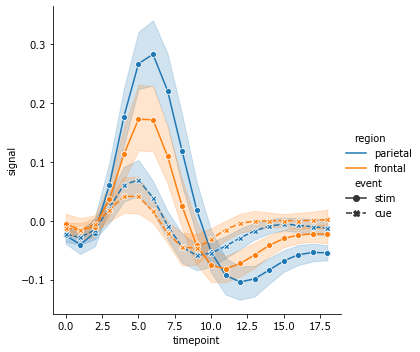

In [18]:
sns.relplot(x = "timepoint", y = "signal", hue = "region", markers = True, dashes = True, 
            style = "event", kind = "line", data = fmri_dataset);

### Showing multiple relationships with facets

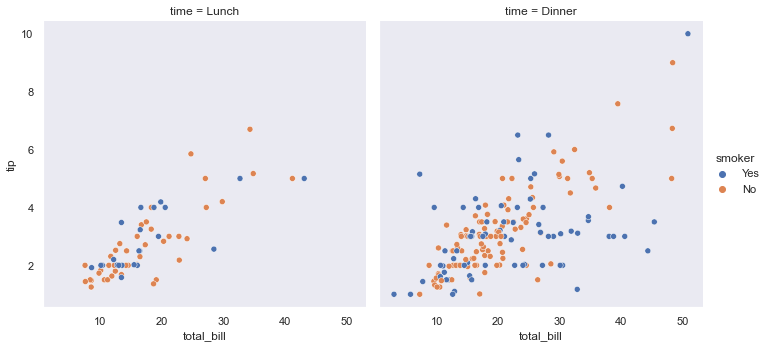

In [19]:
sns.set_theme(style = "dark")
sns.relplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", data = tips_dataset);

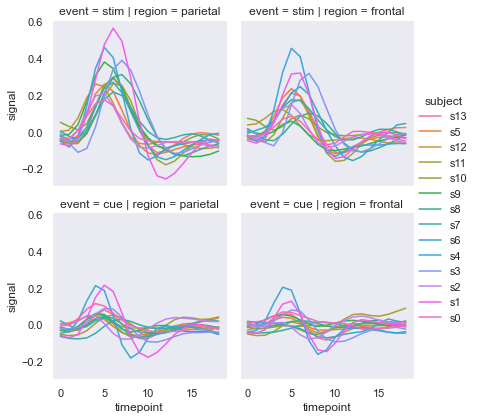

In [20]:
sns.relplot(x = "timepoint", y = "signal", hue = "subject",
            col = "region", row = "event", height = 3,
            kind = "line", estimator = None, data = fmri_dataset);

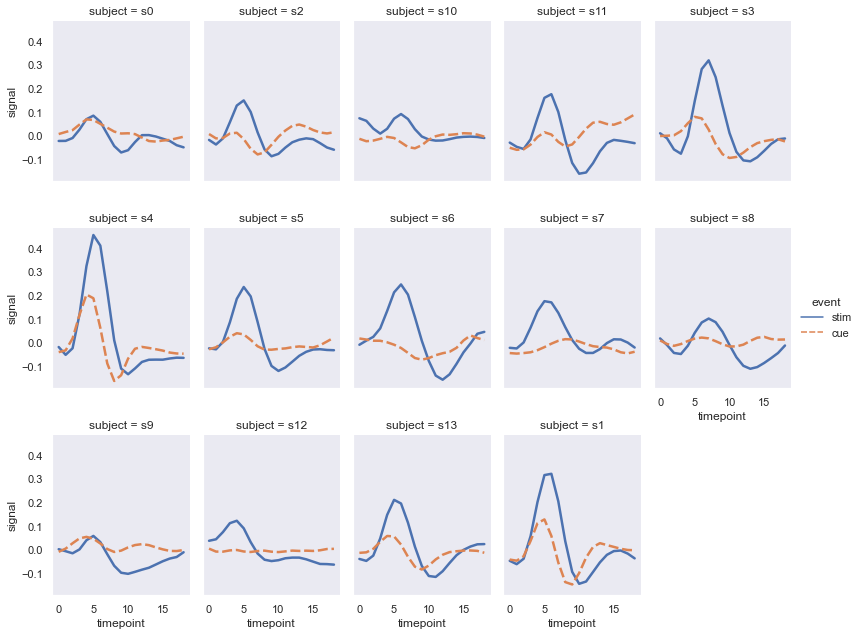

In [21]:
sns.relplot(x = "timepoint", y = "signal", hue = "event", style = "event",
            col = "subject", col_wrap = 5,
            height = 3, aspect = .75, linewidth = 2.5,
            kind = "line", data = fmri_dataset.query("region == 'frontal'"));